In [70]:
# imhe port all the packages we need
import scrapy
import json
import requests
import requests_cache
import numpy as np
import pandas as pd
import seaborn as sns
import urlparse
import csv
import urllib
import os
import os.path
from bs4 import BeautifulSoup
import sys
from lxml import html
import lxml.html as lx
from datetime import time, datetime
from scipy.optimize import curve_fit
from scipy.interpolate import interp1d
from scipy.signal import savgol_filter
from IPython.display import HTML
import re
import seaborn
import matplotlib.pyplot as plt 
import statsmodels.api as sm
import statsmodels.formula.api as smf
from PIL import Image
import plotly.plotly as py
import plotly.graph_objs as go
from resizeimage import resizeimage

import matplotlib.pyplot as plt
requests_cache.install_cache('demo_cache')

In [9]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

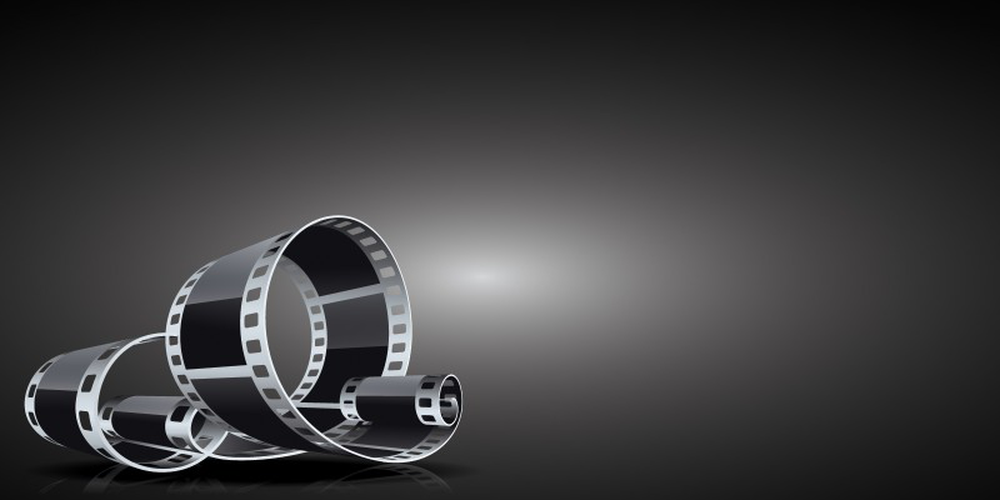

In [56]:
img = Image.open("final.jpg")
cover = resizeimage.resize_cover(img, [1000, 500], validate=False)
cover

<style>
p.big {
    line-height: 50px;
}
</style>
<div style="text-align:justify" lang="latex">
<font size="4" face="Lucida bright">
<h2><center>Investigation about the Preference of Movie Genres</center></h2>
<h3>1. Background:</h3>

$\hspace{2.00cm}$ In recent years, movies are more and more popular. But if we talk about movies with different generations, like our parents or children, it is common for us to have different tastes of movie genres. Hence, we want to investigate the trend of  people’s preference of movie genres around last 30 years? 

</div>

<style>
p.big {
    line-height: 50px;
}
</style>
<div style="text-align:justify" lang="latex">
<font size="4" face="Lucida bright">
<h3>2. Interests: </h3>
$\hspace{2.00cm}$To find and investigate the change of people’s preference on movie genres from 1990 to 2016. <br>
$\hspace{2.00cm}$What is the change? <br>
$\hspace{2.00cm}$When did such change occur? <br>
$\hspace{2.00cm}$Why such change happened? <br>
</div>

<style>
p.big {
    line-height: 50px;
}
</style>
<div style="text-align:justify" lang="latex">
<font size="4" face="Lucida bright">
<h3>3. Gather the Data: </h3>
$\hspace{2.00cm}$1.	Scrape first 100 Most Popular Feature Films from IMDb from 1990 to 2016. [imdb](http://www.imdb.com/) <br>
$\hspace{2.00cm}$2.	Scrape IMDb ID from omdbapi.com. [omdbapi](http://www.omdbapi.com) <br>
$\hspace{2.00cm}$3.	Use IMDb ID to scrape movie information like budget, gross, title, and rating score from IMDb.  <br>
$\hspace{2.00cm}$4.	Scrape information about comic books movies from Wikipedia. [wiki for comic movies](https://en.wikipedia.org/wiki/List_of_films_based_on_comics)  <br>
</div>

<style>
p.big {
    line-height: 50px;
}
</style>
<div style="text-align:justify" lang="latex">
<font size="4" face="Lucida bright">
<h3>4. Questions Coming Out while Analyzing data:</h3>
$\hspace{2.00cm}$1.	Do people have different tastes of movie today compared to in 1990? <br>
$\hspace{2.00cm}$2.	What factors of a movie cause such phenomenon?  <br>
$\hspace{2.00cm}$3.	What makes action movies and adventure movie different from other genres?
</div>

<style>
p.big {
    line-height: 50px;
}
</style>
<div style="text-align:justify" lang="latex">
<font size="4" face="Lucida bright">
<h3>5. Methodology:</h3>
$\hspace{2.00cm}$1.	Using data visualization method to see the change in people’s preference. <br>
$\hspace{2.00cm}$2.	Using linear regression model to figure out which factors cause the change. <br>

</div>

<style>
p.big {
    line-height: 50px;
}
</style>
<div style="text-align:justify" lang="latex">
<font size="4" face="Lucida bright">
<h3>6. Analyzing the Data:</h3>
</div>

In [27]:
HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>''')

def Popular_Movies_search(year,pages,num):
    '''
    This function is used to search movie names.
    Input: The year, pages, and number of movies
    output: the movie names
    '''
    count = 0
    names = []
    # use the url to scrape the imformation contains the name
    for i in range(1,(pages+1)):
        url = "http://www.imdb.com/search/title?title_type=feature&year=" + str(year) + "," +str(year) + "&" "page=" + str(i) + "&sort=moviemeter,asc&" +  "&" + "ref_=adv_prv"        
        r = requests.get(url)
        soup = BeautifulSoup(r.content, "html.parser")
        search_results = soup.find_all("p", class_="sort-num_votes-visible")
        vote = int(search_results[0].find_all('span')[1].text.replace(',',''))
        soup = BeautifulSoup(r.content, "html.parser")
        search_results = soup.find_all("div", class_="lister-item-content")
        

        for result in search_results:
            try:
                vote = int(result.find_all('p')[3].find_all('span')[1].text.replace(',',''))
                if vote < 10000:
                    continue
            except:
                continue
            # get the name and append it to a empty list
            header = result.find("h3", class_="lister-item-header")
            title = header.a
            b = title.get_text().encode('utf-8')
            names.append(b)
            count = count + 1
            if count == num:
                return names
    
    return names

In [41]:
def Movie_info_search(movie):
    '''
    This function is used for search movie information such as director and year
    input: movie name
    output: json format of movie information
    '''
    url = 'http://www.omdbapi.com/?t='+movie.replace(' ','+')+'&plot=full&tomatoes=true'
    response = requests.get(url)
    try:
        js = response.json()
        map(js.pop, ['Plot','DVD','tomatoFresh','Type','Response','tomatoImage','tomatoConsensus','tomatoMeter','tomatoRating','tomatoRotten','tomatoURL','tomatoUserMeter','tomatoUserRating','tomatoUserReviews','tomatoReviews'])
        
        imdb = str(js['imdbID'])
        url1 = 'http://www.imdb.com/title/' + imdb + '/?ref_=fn_al_tt_1'
        r1 = requests.get(url1)
        soup1 = BeautifulSoup(r1.content,"html.parser")
        
        #get the budget and boxoffice
        for itr in soup1.find_all('div',class_ = 'txt-block'):
            if 'Budget' in itr.text:
                js['Budget'] = itr.contents[2].replace(' ','').replace('\n','')
            if 'Gross' in itr.text:
                js['BoxOffice'] = itr.contents[2].replace(' ','').replace('\n','')
                break
        
        url2 = 'http://www.imdb.com/title/' + imdb + '/ratings?ref_=tt_ov_rt'
        r2 = requests.get(url2)
        soup2 = BeautifulSoup(r2.content, "html.parser")
        res_2 = soup2.find_all('td')
        rates = []
        # get and append rating
        for i in xrange(14):
            number = str(res_2[37 + 3*i].text.replace(u'\xa0',u''))
            rate = str(res_2[38 + 3*i].find_all('img')[0].text.replace(u'\xa0',u''))
            rates.append(number)
            rates.append(rate)
        params = {'<18 rating':float(rates[5]),
                  '18-29 rating':float(rates[11]),
                  '30-44 rating':float(rates[17]),
                  '45+ rating':float(rates[23])}
    except:
        return {}     
    js.update(params)
    

    return js

In [4]:
films_name = []
for year in xrange(0,27):
    films_name.append(Popular_Movies_search(year+1990,10,100))

<style>
p.big {
    line-height: 50px;
}
</style>
<div style="text-align:justify" lang="latex">
<font size="4" face="Lucida bright">
<h4>I. Analyzing the frequency of occurrence of movie genres</h4>
</div>

In [ ]:
films_data = pd.DataFrame()
count  = 1990
for year in films_name:
    buff = []
    buff.append(pd.DataFrame.from_dict(Movie_info_search(i) for i in year))
    films_data = pd.concat([films_data,buff[0]])

<style>
p.big {
    line-height: 50px;
}
</style>
<div style="text-align:justify">
<font size="4" face="Lucida bright">
<div lang="latex">
We first want to count the occurrence of each genres of movie in each year. If a movie can be attributed in multiply genres, like actions and adventures, we add one to each genre it has. Then, after the computation, we want to find the trend of the genres’ occurrence and find mainstream genres from 1990 to 2016.
<br>
</div>
</font>
</div>

In [67]:
genre = (',').join(list(Films_data['Genre']))
genrelist = list(set(re.split(', |,',genre)))

getdict = dict()
for g in range(27):
    y = 1990 + g
    getyear = Films_data.loc[Films_data['Year'] == y ]
    genrecount = [0] * 20

    for i in getyear['Genre']:
        for j in range(len(genrelist)): 
            if genrelist[j] in i:
                genrecount[j] = genrecount[j] + 1
    getdict[str(y)] = genrecount 
            


getdict
genredf = pd.DataFrame.from_dict(getdict, orient='columns', dtype=None).transpose()
genredf.columns = genrelist
genredf = genredf.transpose()
fracdf = pd.DataFrame()
fracdict = dict()
for i in genredf.columns.values:
    tmp = range(5)
    total = round(genredf[i].sum(),2)
    tmp[0] = round(genredf[i]['Action']/total,2)
    tmp[1] = round(genredf[i]['Adventure']/total,2)
    tmp[2] = round(genredf[i]['Drama']/total,2)
    tmp[3] = round(genredf[i]['Comedy']/total,2)
    tmp[4] = round(1 - tmp[0] - tmp[1] - tmp[2] - tmp[3],2)
    fracdict[i] = tmp
myaction = list()
myadventure = list()
mydrama = list()
mycomedy = list()
myothers = list()



fracdf = pd.DataFrame.from_dict(fracdict, orient='columns', dtype=None).transpose()

fraclist = ['Action','Adventure','Comedy','Drama','Others']
fracdf.columns = fraclist
my_x = list(genredf.columns.values)
trace1 = go.Bar(
    x= my_x,
    y=fracdf['Action'],
    name= 'Action'
)
trace2 = go.Bar(
    x= my_x,
    y=fracdf['Adventure'],
    name= 'Adventure'
)
trace3 = go.Bar(
    x= my_x,
    y=fracdf['Comedy'],
    name='Comedy'
)
trace4 = go.Bar(
    x= my_x,
    y= fracdf['Drama'],
    name= 'Drama'
)
trace5 = go.Bar(
    x= my_x,
    y=fracdf['Others'],
    name= 'Others'
)


data = [trace5, trace4,trace3,trace2, trace1]
layout = go.Layout(
    barmode='stack'
)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='stacked-bar')

<style>
p.big {
    line-height: 50px;
}
</style>
<div style="text-align:justify">
<font size="4" face="Lucida bright">
<div lang="latex">
From the above interactive plot, we can notice that there are four most popular genres: Action, Adventure, Comedy and Drama. And we also notice that from 1990 to 2016, the frequences of occurance of each of these four genres do not change a lot. Does this really mean the people's preference on movie not change? <br/>
<br>
</div>
</font>
</div>

<style>
p.big {
    line-height: 50px;
}
</style>
<div style="text-align:justify" lang="latex">
<font size="4" face="Lucida bright">
<h5>II. Analyzing the frequency of occurrence of movie genres:</h5>
</div>

<style>
p.big {
    line-height: 50px;
}
</style>
<div style="text-align:justify">
<font size="4" face="Lucida bright">
<div lang="latex">
Then we want to check another indicator of genres' popularity: The Gross. <br/><br/>
Here we define the gross ratio for one genre as $\frac{total\hspace{0.07cm}gross\hspace{0.07cm}of\hspace{0.07cm}one\hspace{0.07cm}genre\hspace{0.07cm}in\hspace{0.07cm}a\hspace{0.07cm}year}{the\hspace{0.07cm}total\hspace{0.07cm}gross\hspace{0.07cm}of\hspace{0.07cm}all\hspace{0.07cm}genres\hspace{0.07cm}in\hspace{0.07cm}a\hspace{0.07cm}year}$. Plotting the gross ratio from 1990 to 2016, we want to see is there any change for gross ratio of these four major genres. 
<br/>
</div>
</font>
</div>

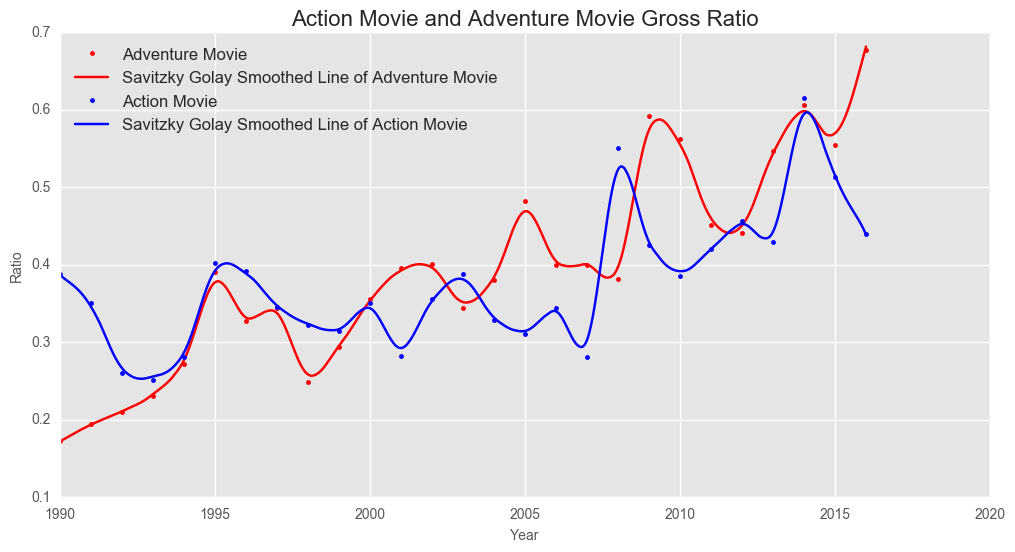

In [60]:
x = np.array(Rate['Year'])
y1 = np.array(Rate['Act_Box_rate'])
y2 = np.array(Rate['Adv_Box_rate'])

xx = np.linspace(x.min(),x.max(), 1000)

# interpolate + smooth
itp1 = interp1d(x,y1, kind='linear')
itp2 = interp1d(x,y2, kind='linear')
window_size, poly_order = 101, 4
yy1_sg = savgol_filter(itp1(xx), window_size, poly_order)
yy2_sg = savgol_filter(itp2(xx), window_size, poly_order)


fig, ax = plt.subplots(figsize=(12,6))

ax.plot(x, y2, 'r.', label= 'Adventure Movie',color = 'red')
ax.plot(xx, yy2_sg, 'k', label= "Savitzky Golay Smoothed Line of Adventure Movie",color = 'red')

ax.plot(x, y1, 'r.', label= 'Action Movie',color = 'Blue')
ax.plot(xx, yy1_sg, 'k', label= "Savitzky Golay Smoothed Line of Action Movie",color = 'Blue')

plt.xlabel('Year',fontsize = 10)
plt.ylabel('Ratio',fontsize = 10)
plt.title('Action Movie and Adventure Movie Gross Ratio',fontsize = 16)
plt.legend(loc='best',prop={'size':12})
plt.show()

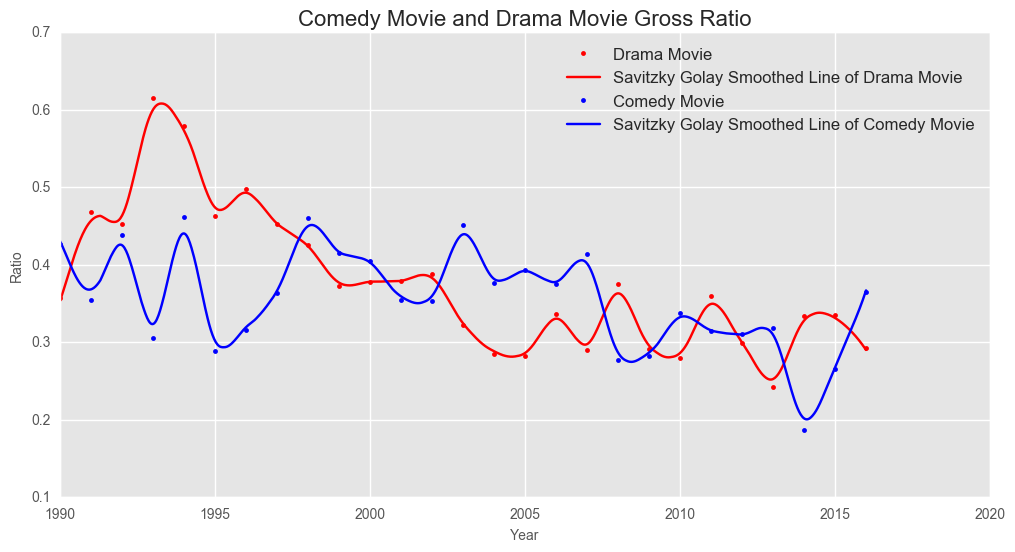

In [72]:
x = np.array(Rate['Year'])
y1 = np.array(Rate['Com_Box_rate'])
y2 = np.array(Rate['Dra_Box_rate'])

xx = np.linspace(x.min(),x.max(), 1000)

# interpolate + smooth
itp1 = interp1d(x,y1, kind='linear')
itp2 = interp1d(x,y2, kind='linear')
window_size, poly_order = 101, 4
yy1_sg = savgol_filter(itp1(xx), window_size, poly_order)
yy2_sg = savgol_filter(itp2(xx), window_size, poly_order)


fig, ax = plt.subplots(figsize=(12, 6))

ax.plot(x, y2, 'r.', label= 'Drama Movie',color = 'red')
ax.plot(xx, yy2_sg, 'k', label= "Savitzky Golay Smoothed Line of Drama Movie",color = 'red')

ax.plot(x, y1, 'r.', label= 'Comedy Movie',color = 'Blue')
ax.plot(xx, yy1_sg, 'k', label= "Savitzky Golay Smoothed Line of Comedy Movie",color = 'Blue')

plt.xlabel('Year',fontsize = 10)
plt.ylabel('Ratio',fontsize = 10)
plt.title('Comedy Movie and Drama Movie Gross Ratio',fontsize = 16)
plt.legend(loc='best',prop={'size':12})
plt.show()

<style>
p.big {
    line-height: 50px;
}
</style>
<div style="text-align:justify">
<font size="4" face="Lucida bright">
From these two plots above, from 1990 to 2016, the gross ratios for comedy and drama movies are both decreasing. In 1990, the ratio for comedy and drama movies is about 45%, but in 2016, thr ratio decreases to aroud 25%. On the contrary, the gross ratios of action and adventure movies are both increasing. In 1990, the ratio for action and adventure movies is about 25% but increases to about 55% in 2016. <br/>
<br/>
Hence, based on this found, we can have an answer to our first question.
<h6> Question 1: Do people have different taste of movie today compared to in 1990? <br><br>
Conclusion 1: Nowadays, People are more attracted by action and adventure movies and seem to be tired of comedy and drama movies. </h6><br/>
<br/>
That's an interesting phenomenon. We are curious about what factors cause the change in people's preference. So here we are going to investigate the second question.<br><br>

</font>
</div>

<style>
p.big {
    line-height: 50px;
}
</style>
<div style="text-align:justify" lang="latex">
<font size="4" face="Lucida bright">
<h4>III. Constructing the linear model to investigate the relationship:</h4>
</div>

<style>
p.big {
    line-height: 50px;
}
</style>
<div style="text-align:justify">
<font size="4" face="Lucida bright">
We find the two numerical data in our data frame, which are imdb rating and the movie's budget.<br><br>


Hence, firstly, we want to see whether such phenomenon is caused by by the movies' budgets since we all know action and adventure movies usually have higher budget than comedy and drama movies. Since considering about the influence of the inflation and the different number of different genres of movies in a year, we define budget ratio for one genre in one year as
$\frac{the\hspace{0.07cm}average\hspace{0.07cm}budget\hspace{0.07cm}of\hspace{0.07cm}one\hspace{0.07cm}genre\hspace{0.07cm}in\hspace{0.07cm}one\hspace{0.07cm}year}
{the\hspace{0.07cm}average\hspace{0.07cm}budget\hspace{0.07cm}of\hspace{0.07cm}all\hspace{0.07cm}genres\hspace{0.07cm}in\hspace{0.07cm}one\hspace{0.07cm}year}$. 
When the budget ratio is higher than 1, it indicates that the average budget of that genre of movies in that year exceeds the average budget of all genres of movies in that year.<br><br>

Next, we want to see how the budget ratio changes for these four genres according to years.

</font>
</div>

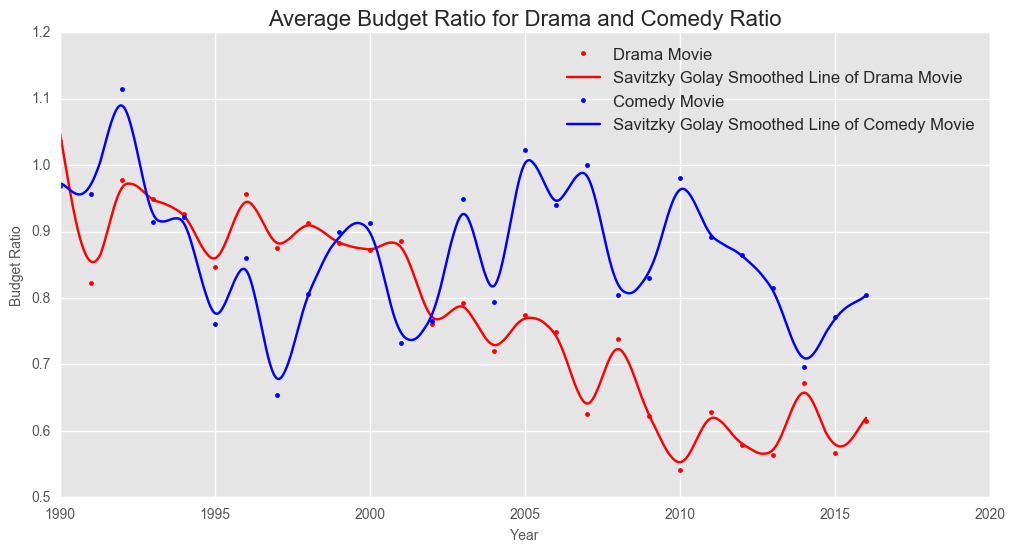

In [62]:
x = np.array(Rate['Year'])
y1 = np.array(Rate['Com_Bugt'])
y2 = np.array(Rate['Dra_Bugt'])


xx = np.linspace(x.min(),x.max(), 1000)

# interpolate + smooth
itp1 = interp1d(x,y1, kind='linear')
itp2 = interp1d(x,y2, kind='linear')

window_size, poly_order = 101, 4
yy1_sg = savgol_filter(itp1(xx), window_size, poly_order)
yy2_sg = savgol_filter(itp2(xx), window_size, poly_order)



fig, ax = plt.subplots(figsize=(12, 6))

ax.plot(x, y2, 'r.', label= 'Drama Movie',color = 'red')
ax.plot(xx, yy2_sg, 'k', label= "Savitzky Golay Smoothed Line of Drama Movie",color = 'red')

ax.plot(x, y1, 'r.', label= 'Comedy Movie',color = 'Blue')
ax.plot(xx, yy1_sg, 'k', label= "Savitzky Golay Smoothed Line of Comedy Movie",color = 'Blue')


plt.xlabel('Year',fontsize = 10)
plt.ylabel('Budget Ratio',fontsize = 10)
plt.title('Average Budget Ratio for Drama and Comedy Ratio',fontsize = 16)
plt.legend(loc='best',prop={'size':12})
plt.show()

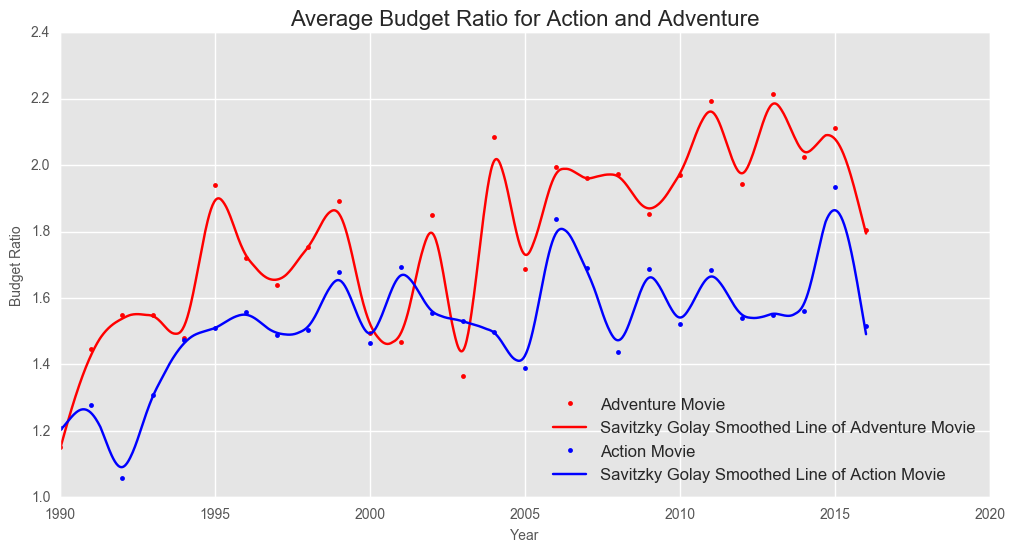

In [69]:
x = np.array(Rate['Year'])
y1 = np.array(Rate['Act_Bugt'])
y2 = np.array(Rate['Adv_Bugt'])


xx = np.linspace(x.min(),x.max(), 1000)

# interpolate + smooth
itp1 = interp1d(x,y1, kind='linear')
itp2 = interp1d(x,y2, kind='linear')

window_size, poly_order = 101, 4
yy1_sg = savgol_filter(itp1(xx), window_size, poly_order)
yy2_sg = savgol_filter(itp2(xx), window_size, poly_order)



fig, ax = plt.subplots(figsize=(12, 6))

ax.plot(x, y2, 'r.', label= 'Adventure Movie',color = 'red')
ax.plot(xx, yy2_sg, 'k', label= "Savitzky Golay Smoothed Line of Adventure Movie",color = 'red')

ax.plot(x, y1, 'r.', label= 'Action Movie',color = 'Blue')
ax.plot(xx, yy1_sg, 'k', label= "Savitzky Golay Smoothed Line of Action Movie",color = 'Blue')


plt.xlabel('Year',fontsize = 10)
plt.ylabel('Budget Ratio', fontsize = 10)
plt.title('Average Budget Ratio for Action and Adventure',fontsize = 16)
plt.legend(loc='best',prop={'size':12})
plt.show()

<style>
p.big {
    line-height: 50px;
}
</style>
<div style="text-align:justify">
<font size="4" face="Lucida bright">
From the plots above, we observe that the budget ratios for comedy and drama movies are decreasing by years. And the budget ratios for action and adventure movies are increasing by years. This change tendency correspnds to the change tendency of people's preference of movie genres. Thus, we want to build a linear regression model to see the relationship between Gross ratio and Budget ratio
</font>
</div>

<h3>--------------------------------------------------------------------------------------------------------------------------------------------------</h3>

In [31]:
mean_action = []
mean_adventure = []
mean_comedy = []
mean_drama = []

budget_action = []
budget_adventure = []
budget_comedy = []
budget_drama = []

imdb_action = []
imdb_adventure = []
imdb_comedy = []
imdb_drama = []

#get the gross, budget and imdb rating information about all the four genres
for i in range(27):
    test = 'Year == '+ str(1990 + i)
    mean_action.append(Action_Film.query(test)["BoxOffice"].sum()/Films_data.query(test)['BoxOffice'].sum())
    mean_adventure.append(Adventure_Film.query(test)["BoxOffice"].sum()/Films_data.query(test)['BoxOffice'].sum())
    mean_comedy.append(Comedy_Film.query(test)["BoxOffice"].sum()/Films_data.query(test)['BoxOffice'].sum())
    mean_drama.append(Drama_Film.query(test)["BoxOffice"].sum()/Films_data.query(test)['BoxOffice'].sum())
    
    budget_action.append(Action_Film.query(test)["Budget"].mean()/Films_data.query(test)['Budget'].mean())
    budget_adventure.append(Adventure_Film.query(test)["Budget"].mean()/Films_data.query(test)['Budget'].mean())
    budget_comedy.append(Comedy_Film.query(test)["Budget"].mean()/Films_data.query(test)['Budget'].mean())
    budget_drama.append(Drama_Film.query(test)["Budget"].mean()/Films_data.query(test)['Budget'].mean())
    
    imdb_action.append(Action_Film.query(test)["imdbRating"].mean()/Films_data.query(test)['imdbRating'].mean())
    imdb_adventure.append(Adventure_Film.query(test)["imdbRating"].mean()/Films_data.query(test)['imdbRating'].mean())
    imdb_comedy.append(Comedy_Film.query(test)["imdbRating"].mean()/Films_data.query(test)['imdbRating'].mean())
    imdb_drama.append(Drama_Film.query(test)["imdbRating"].mean()/Films_data.query(test)['imdbRating'].mean())
action = pd.DataFrame({'Gross' : mean_action,
 'Budget' : budget_action,
 'imdb': imdb_action                    
  }, columns=['Gross','Budget','imdb'])
action['Genre'] = 'action_and_adventure'

adventure = pd.DataFrame({'Gross' : mean_adventure,
 'Budget' : budget_adventure,
 'imdb': imdb_adventure                    
  }, columns=['Gross','Budget','imdb'])
adventure['Genre'] = 'action_and_adventure'

comedy = pd.DataFrame({'Gross' : mean_comedy,
 'Budget' : budget_comedy,
 'imdb': imdb_comedy                   
  }, columns=['Gross','Budget','imdb'])
comedy['Genre'] = 'comedy_and_drama'

drama = pd.DataFrame({'Gross' : mean_drama,
 'Budget' : budget_drama,
 'imdb': imdb_drama                    
  }, columns=['Gross','Budget','imdb'])
drama['Genre'] = 'comedy_and_drama'

total = pd.concat([action,adventure,drama,comedy])
total = total.reset_index(drop = True)

<style>
p.big {
    line-height: 50px;
}
</style>
<div style="text-align:justify">
<font size="4" face="Lucida bright">
This is the summary for the linear regression model $$Gross Ratio \sim Budget Ratio$$

where independent variable is the budget ratio and the dependent variable is the gross ratio. R-squared is defined to represent how close the data are to the fitted regression line. In this model, the R-squared value is only 0.102, which is very small. Thus, the data is far from the regression line of this model, which indicates that there is no strong linear relationship between gross ratio and budget ratio. So, we conclude the change of the gross ratio is not mainly caused by the change of budget ratio.<br/>
<br/>
But there is another numerical variable, which is the imdb rating. Will the imdb rating help us to explain the change of people's preference? Next, we add imdb rating as another factor to our linear regression model. 
</font>
</div>

In [32]:
fit a linear model
mod = smf.ols('Gross ~ Budget', data=total).fit()
print mod.summary()


                            OLS Regression Results                            
Dep. Variable:                  Gross   R-squared:                       0.102
Model:                            OLS   Adj. R-squared:                  0.093
Method:                 Least Squares   F-statistic:                     12.00
Date:                Wed, 22 Mar 2017   Prob (F-statistic):           0.000769
Time:                        19:51:06   Log-Likelihood:                 104.28
No. Observations:                 108   AIC:                            -204.6
Df Residuals:                     106   BIC:                            -199.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      0.2936      0.025     11.549      0.0

<h3>--------------------------------------------------------------------------------------------------------------------------------------------------</h3>

<style>
p.big {
    line-height: 50px;
}
</style>
<div style="text-align:justify">
<font size="4" face="Lucida bright">
This is the summary for the linear regression model $$Gross Ratio \sim Budget Ratio + IMDB ratings$$
whose dependent variable is gross ratio and the independent variables are imdb rating and budget ration.<br/>
<br/>
We see the R-squared is only 0.195. Thus, we don't think budget ratio and imdb rating have a strong relationship with gross ratio.
</font>
</div>

In [33]:
mod_2 = smf.ols('Gross ~ Budget + imdb', data=total).fit()

print mod_2.summary()

                            OLS Regression Results                            
Dep. Variable:                  Gross   R-squared:                       0.195
Model:                            OLS   Adj. R-squared:                  0.180
Method:                 Least Squares   F-statistic:                     12.72
Date:                Wed, 22 Mar 2017   Prob (F-statistic):           1.13e-05
Time:                        19:51:11   Log-Likelihood:                 110.20
No. Observations:                 108   AIC:                            -214.4
Df Residuals:                     105   BIC:                            -206.4
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     -0.5083      0.231     -2.200      0.0

<h3>--------------------------------------------------------------------------------------------------------------------------------------------------</h3>

<style>
</style>
<div style="text-align:justify">
<font size="4" face="Lucida bright">
Hence, based on the linear regression models we constructed, the answer we have for the second question is that
<font size="4" face="Lucida bright">
<h6> Question 2: What factors of a movie cause the such phenomenon? <br><br>
Conclusion 2: Even though we have noticed that the change of budget ratio corresponds to the change of gross ratio, we cannot simply explain the increasing popularity of action and adventure movies due to their increasing budget and the imdb rating  </h6>


</font>
</div>

<style>
p.big {
    line-height: 50px;
}
</style>
<div style="text-align:justify">
<font size="4" face="Lucida bright">
 We have considered to add more factors to our model to increase the reliability. But the problem is that other factors cannot be easily transferred to numerical variables. So instead of continuing adding more factors to our linear model or use other statistic model, we want to start to think this problem from a different perspective, which is the third question.
</font>

</div>

<style>
p.big {
    line-height: 50px;
}
</style>
<div style="text-align:justify" lang="latex">
<font size="4" face="Lucida bright">
<h5>IV. Investigating Comic Books Movie</h5>
</div>

<style>
p.big {
    line-height: 100px;
}
</style>
<div style="text-align:justify">
<font size="4" face="Lucida bright">
</div>
<br>
<div style="text-align:justify">
<font size="4" face="Lucida bright">
We get some hints to answer the third question while we analysis a special subgroup of action and adventure movies – comic books movie. In recent years, increasing amount of successful comic books movies come into view. We might consider comic books movie contain the important information of the reason to our question. <br><br>


But first, we still need check whether is it true that on average the comic movies are popular these days.
</div>

In [34]:
import plotly.plotly as py
import plotly.graph_objs as go

fig = {
  "data": [
    {
      "values": [0.0756,0.0338,1-0.0756-0.0338],
      "labels": [
        "Comic Books Movie",
        "In Average",
        "Others"
      ],
      "domain": {"x": [0, .48]},
      "name": "Action Movies",
      "hoverinfo":"label+percent+name",
      "hole": .4,
      "type": "pie"
    },     
    {
      "values": [0.0724, 0.0394,1-0.0724-0.0394],
      "labels": [
        "Comic Books Movie",
        "In Average",
        "Others"
      ],
      "textposition":"inside",
      "domain": {"x": [.52, 1]},
      "name": "Adventure Movies",
      "hoverinfo":"label+percent+name",
      "hole": .4,
      "type": "pie"
    }],
  "layout": {
        "title":"How much does Comic Books Movie contribute in average?",
        "annotations": [
            {
                "font": {
                    "size": 20
                },
                "showarrow": False,
                "text": "Action",
                "x": 0.20,
                "y": 0.5
            },
            {
                "font": {
                    "size": 20
                },
                "showarrow": False,
                "text": "Adventure",
                "x": 0.83,
                "y": 0.5
            }
        ]
    }
}
py.iplot(fig)


<style>
p.big {
    line-height: 30px;
}
</style>

<font size="4" face="Lucida bright">
<div style="text-align:justify">
From this pie plot, we observe that on average, for action movies, one comic movie (belonging to action genre) contributes 7.56% to the total gross of action movies in one year, where one common action movie only contributes 3.38% to the total gross of action movies. The situation is similar for adventure movies. We conclude that comic books movies do follow the growing trend of action movies and adventure movies. 
<br><br>

So, what makes the comic books movie different from other types of movies? Through the data mining, we give an explaining based on the following plots.
</div>

In [35]:
Act_Series_movie = Act_Series_movie.reset_index(drop = True)
Action_Film =  Action_Film.reset_index(drop = True)
Adventure_Film = Adventure_Film.reset_index(drop = True)
Comedy_Film = Comedy_Film.reset_index(drop = True)
Drama_Film = Drama_Film.reset_index(drop = True)

act_series = []
for i in Act_Series_movie['Title']:
    act_series.append(i)
    
under_18 = []
y18_y29 = []
y30_y44 = []
over45 = []

for i in xrange(52):
    under_18.append(Act_Series_movie['<18 rating'][i])
    y18_y29.append(Act_Series_movie['18-29 rating'][i])
    y30_y44.append(Act_Series_movie['30-44 rating'][i])
    over45.append(Act_Series_movie['45+ rating'][i])

non_comic = []

for i in Action_Film['Title']:
    if i not in act_series:
        non_comic.append(i)
        
under_18_2 = []
y18_y29_2 = []
y30_y44_2 = []
over45_2 = []

for i in xrange(len(Action_Film['Title'])):
    under_18_2.append(Action_Film['<18 rating'][i])
    y18_y29_2.append(Action_Film['18-29 rating'][i])
    y30_y44_2.append(Action_Film['30-44 rating'][i])
    over45_2.append(Action_Film['45+ rating'][i])
    
under_18_3 = []
y18_y29_3 = []
y30_y44_3 = []
over45_3 = []

for i in xrange(len(Adventure_Film['Title'])):
    under_18_3.append(Adventure_Film['<18 rating'][i])
    y18_y29_3.append(Adventure_Film['18-29 rating'][i])
    y30_y44_3.append(Adventure_Film['30-44 rating'][i])
    over45_3.append(Adventure_Film['45+ rating'][i])
    
under_18_4 = []
y18_y29_4 = []
y30_y44_4 = []
over45_4 = []

for i in xrange(len(Comedy_Film['Title'])):
    under_18_4.append(Comedy_Film['<18 rating'][i])
    y18_y29_4.append(Comedy_Film['18-29 rating'][i])
    y30_y44_4.append(Comedy_Film['30-44 rating'][i])
    over45_4.append(Comedy_Film['45+ rating'][i])
    
under_18_5 = []
y18_y29_5 = []
y30_y44_5 = []
over45_5 = []

for i in xrange(len(Drama_Film['Title'])):
    under_18_5.append(Drama_Film['<18 rating'][i])
    y18_y29_5.append(Drama_Film['18-29 rating'][i])
    y30_y44_5.append(Drama_Film['30-44 rating'][i])
    over45_5.append(Drama_Film['45+ rating'][i])

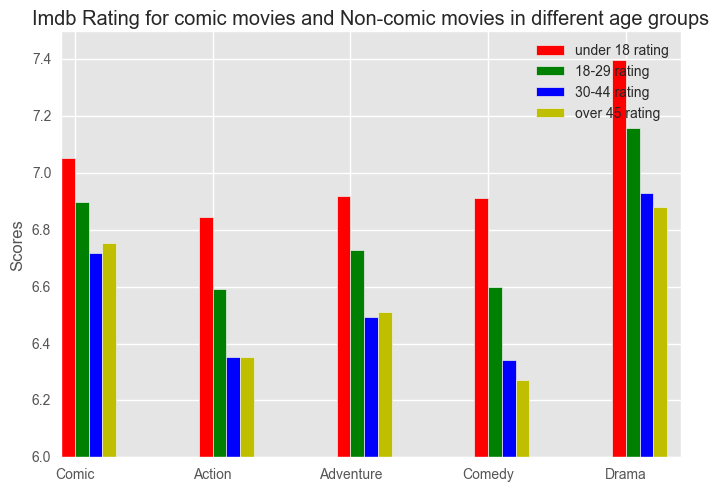

In [36]:
# how many bar plots
N = 5 
ind = np.arange(N)  # the x locations for the groups
width = 0.1       # the width of the bars

fig = plt.figure()
ax = fig.add_subplot(111)

yvals = [sum(under_18)/len(under_18), sum(under_18_2)/len(under_18_2),sum(under_18_3)/len(under_18_3),sum(under_18_4)/len(under_18_4),sum(under_18_5)/len(under_18_5)]
rects1 = ax.bar(ind, yvals, width, color='r')

zvals = [sum(y18_y29)/len(y18_y29), sum(y18_y29_2)/len(y18_y29_2), sum(y18_y29_3)/len(y18_y29_3), sum(y18_y29_4)/len(y18_y29_4), sum(y18_y29_5)/len(y18_y29_5)]
rects2 = ax.bar(ind+width, zvals, width, color='g')

kvals = [sum(y30_y44)/len(y30_y44), sum(y30_y44_2)/len(y30_y44_2),sum(y30_y44_3)/len(y30_y44_3),sum(y30_y44_4)/len(y30_y44_4),sum(y30_y44_5)/len(y30_y44_5)]
rects3 = ax.bar(ind+width*2, kvals, width, color='b')

qvals = [sum(over45)/len(over45), sum(over45_2)/len(over45_2), sum(over45_3)/len(over45_3), sum(over45_4)/len(over45_4), sum(over45_5)/len(over45_5)]
rects4 = ax.bar(ind+width*3, qvals, width, color='y')

ax.set_ylabel('Scores')
ax.set_xticks(ind+width)
ax.set_xticklabels(('Comic', 'Action','Adventure','Comedy','Drama'))
ax.legend((rects1[0], rects2[0], rects3[0],rects4[0]), ('under 18 rating', '18-29 rating', '30-44 rating','over 45 rating') )
ax.set_ylim([6,7.5])
ax.title.set_text('Imdb Rating for comic movies and Non-comic movies in different age groups')

def autolabel(rects):
    for rect in rects:
        h = rect.get_height()
        

autolabel(rects1)
autolabel(rects2)
autolabel(rects3)
autolabel(rects4)

plt.show()

<style>
p.big {
    line-height: 30px;
}
</style>

<font size="4" face="Lucida bright">
<div style="text-align:justify">
This plot indicates the IMDB score among different age groups (under 18, 19-25, 25-40, over 45). We notice that, for comic books movie, the difference of rating among four age groups is smaller than it for non-comic books movie and it for comedy and adventure movies. 
<br><br>
Such finding drives us to check the variance of the IMDB score in different age groups for different types of movies. 
We consider that if such variance is small, that type of movie is welcomed in all age groups and vice versa. Hence, we plot the variance in each year to analysis the action movies and comedy movies.
</div>

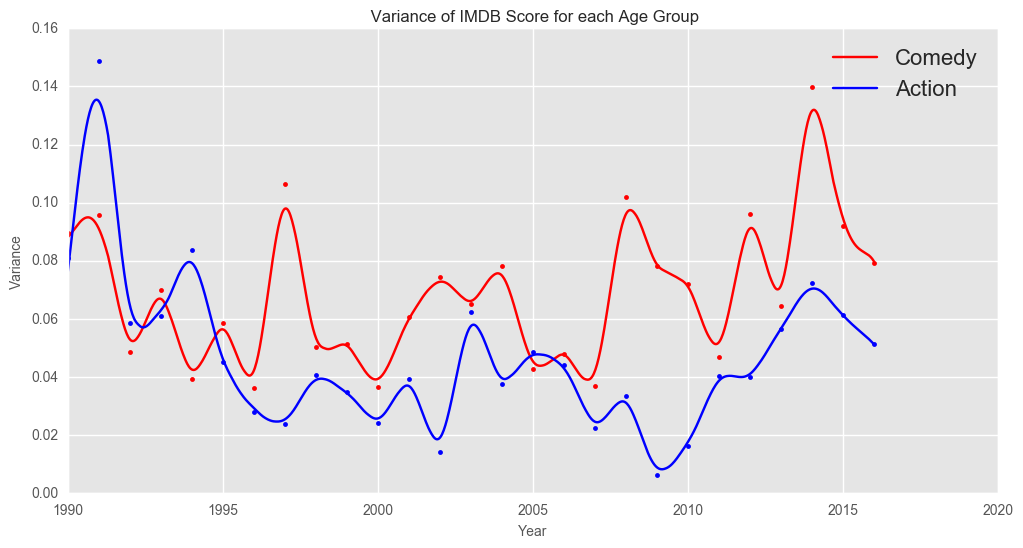

In [64]:
x = np.array(Rate['Year'])
y1 = np.array(Rate['var1'])
y2 = np.array(Rate['var2'])

xx = np.linspace(x.min(),x.max(), 1000)

# interpolate + smooth
itp1 = interp1d(x,y1, kind='linear')
itp2 = interp1d(x,y2, kind='linear')
window_size, poly_order = 101, 4
yy1_sg = savgol_filter(itp1(xx), window_size, poly_order)
yy2_sg = savgol_filter(itp2(xx), window_size, poly_order)


fig, ax = plt.subplots(figsize=(12, 6))

ax.plot(x, y2, 'r.',color = 'red')
ax.plot(xx, yy2_sg, 'k',color = 'red',label = 'Comedy')

ax.plot(x, y1, 'r.', color = 'Blue')
ax.plot(xx, yy1_sg, 'k',color = 'Blue',label = 'Action')

plt.xlabel('Year',fontsize = 10)
plt.ylabel('Variance',fontsize = 10)
plt.title(' Variance of IMDB Score for each Age Group',fontsize = 12)
plt.legend(loc='best',prop={'size':16})
plt.show()

<style>
p.big {
    line-height: 30px;
}
</style>

<font size="4" face="Lucida bright">
<div style="text-align:justify">
From the plot, we notice that from 1995, the variance for comedy movies becomes higher than it for action movies. Moreover, the variance also achieves its peak in 2014, just like action movies did in 1991. It corresponds to the increasing popularity of action movies and decreasing popularity of comedy movies.
We can have the conclusion for our question 3.

<h6>Question 3: What makes action movies and adventure movie different? <br><br>
Conclusion 3: The action movies and adventure movies usually achieve the similar popularities in different age group. In another word, nowadays,they usually attract a larger age range of audience than comic and drama movie do.</h6>
</div>
<br>
</div>

<style>
p.big {
    line-height: 30px;
}
</style>
 

<div style="text-align:justify">
<font size="4" face="Lucida bright">

<h2> Overall Conclusions: </h2>
<br>
1.Nowadays, people prefer action and adventure movies instead of comedy and drama movies, which is the opposite situation in 1990.<br><br>

2.Even though it’s true that action movies and adventure movies usually have higher budget, based on the linear model we constructed, we cannot simply use the increasing budget to explain the increasing popularity of these two genres.<br><br>

3.Notice that action movies and adventure movies (especially for comic books movie) have smaller variance in IMDB score among different age groups than comedy and drama movies have. This indicates that one of the reason about the increasing popularity of action and adventure movies is that they are not only popular among young children (18), but also attracts people in elder age groups.<br><br>

4.Our explaining for the change of people’s preference for movie genres: The change of the primary consumers of movie results in the change of the overall preferences of the movies genres. (Action, Adventure rise, Drama, Comedy fall). <br><br>

Ex: Young children in about 1990 were largely influenced by the culture of comic books movie and high technology. Hence in today, when they become the majority consumers of movies, their expectation for movies is, unlike the expectation in 1990, become action and adventure movies, which largely contain the elements of comic books and high technology.
</div>

<style>
p.big {
    line-height: 30px;
}
</style>
 

<div style="text-align:justify">
<font size="4" face="Lucida bright">

<h2> Potential Error: </h2>
<br>
1. Data error in IMDb. We have manually corrected one information error from the data we collected. There might be more error which might influence our analysis. <br><br>

2. No indicator variables in the linear mode to increase the reliability.